In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import scipy.stats as stats
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV

/Users/xuhong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('housing2(2).csv')

In [3]:
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


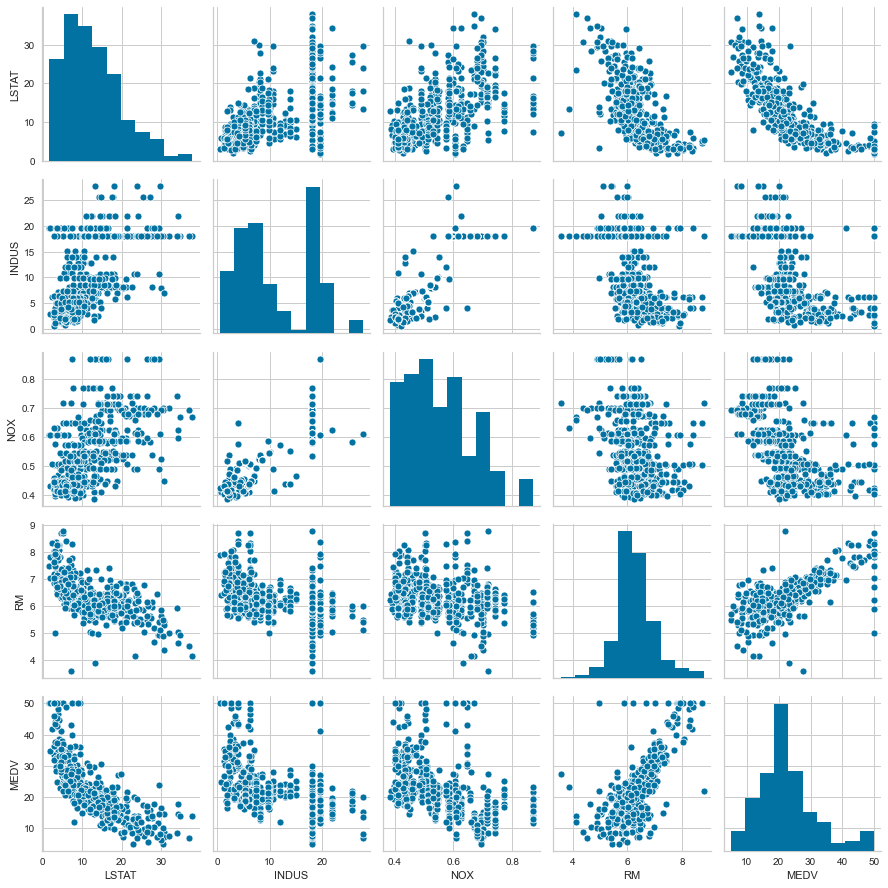

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

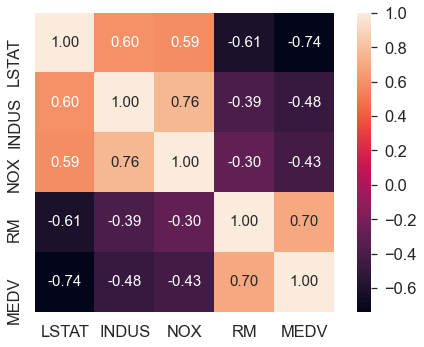

In [5]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,
                 xticklabels=cols)
plt.show()               

In [6]:
pp_data = df.loc[:,'RM']

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

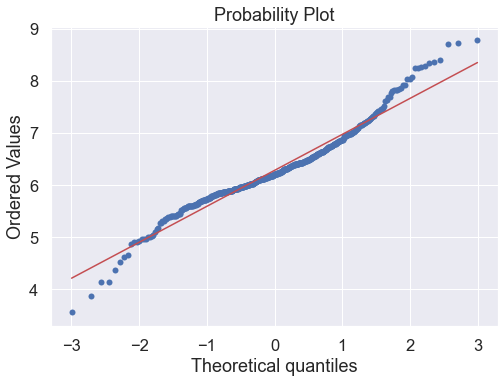

In [7]:
stats.probplot(pp_data, dist='norm',plot=pylab)

In [8]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
#LinearRegression

In [12]:
slr = LinearRegression()
slr.fit(X_train_std, y_train)
y_train_pred1 = slr.predict(X_train_std)
y_test_pred1 = slr.predict(X_test_std)

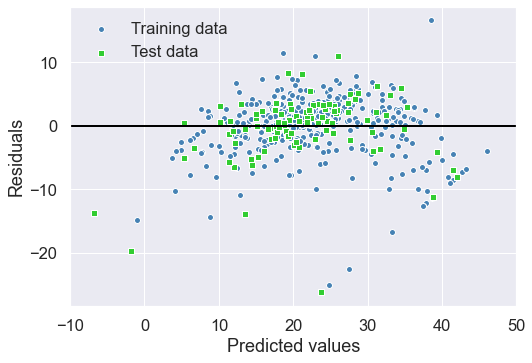

In [13]:
plt.scatter(y_train_pred1, y_train_pred1-y_train, c='steelblue', marker='o', edgecolor='white',
label='Training data') 
plt.scatter(y_test_pred1, y_test_pred1-y_test,
c='limegreen', marker='s', edgecolor='white',
label='Test data') 
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2) 
plt.xlim([-10, 50])
plt.show()

In [14]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred1),mean_squared_error(y_test, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred1), r2_score(y_test, y_test_pred1)))
print(slr.coef_,slr.intercept_)



MSE train: 20.613, test: 26.630
R^2 train: 0.763, test: 0.637
[ 0.81576845 -0.07167494  0.1626726  -0.03095303 -0.21689699 -0.17436198
  0.18945189 -0.07986522 -0.04284088 -0.29269901 -0.27839046  0.13052308
 -0.03917064 -1.13411737  0.74827014  0.27727456  0.70802424 -2.00127056
  3.17561044 -0.17974237 -3.12986203  2.20304907 -1.74483928 -1.98596453
  1.19684554 -3.55844917] 22.796534653465383


In [15]:
#ridge regression 

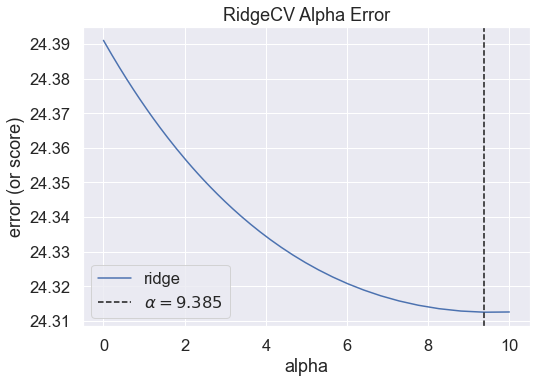

In [16]:
alphas1 = np.logspace(-10, 1, 400)
model = RidgeCV(alphas=alphas1)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_std, y_train)
visualizer.show()

In [17]:
ridge = Ridge(alpha=9.385)
ridge.fit(X_train_std, y_train)
y_train_pred2 = ridge.predict(X_train_std)
y_test_pred2 = ridge.predict(X_test_std)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred2),mean_squared_error(y_test, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred2), r2_score(y_test, y_test_pred2)))
print(ridge.coef_,ridge.intercept_)


MSE train: 20.695, test: 26.742
R^2 train: 0.762, test: 0.635
[ 0.78962525 -0.09285859  0.1494771  -0.03755549 -0.23018224 -0.15621739
  0.19918585 -0.08477565 -0.05085311 -0.29025028 -0.26417314  0.13093716
 -0.05076515 -1.04413409  0.60300853  0.09149889  0.73612899 -1.7360696
  3.21130716 -0.18547792 -2.80822413  1.63343591 -1.25197363 -1.90846369
  1.17161784 -3.45485259] 22.796534653465383


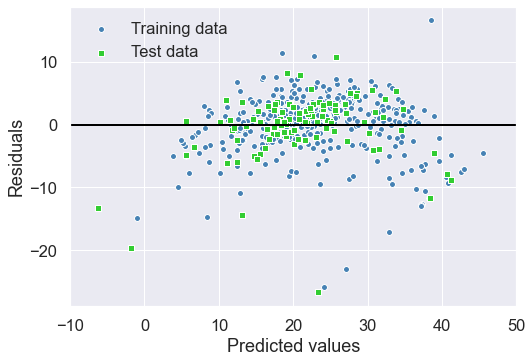

In [18]:
plt.scatter(y_train_pred2, y_train_pred2-y_train, c='steelblue', marker='o', edgecolor='white',
label='Training data') 
plt.scatter(y_test_pred2, y_test_pred2-y_test,
c='limegreen', marker='s', edgecolor='white',
label='Test data') 
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2) 
plt.xlim([-10, 50])
plt.show()

In [19]:
#Lasso

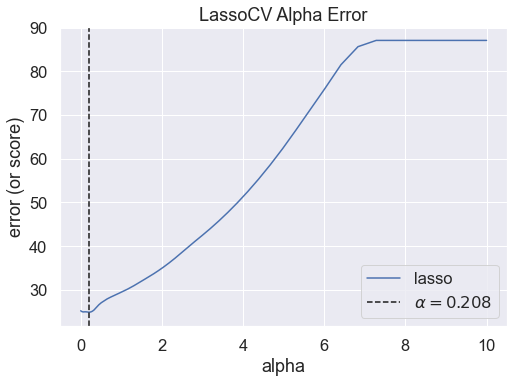

In [20]:
alphas = np.logspace(-10, 1, 400)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_std, y_train)
visualizer.show()

In [36]:
lasso = Lasso(alpha=0.208)
lasso.fit(X_train_std, y_train)
y_train_pred3 = lasso.predict(X_train_std)
y_test_pred3 = lasso.predict(X_test_std)

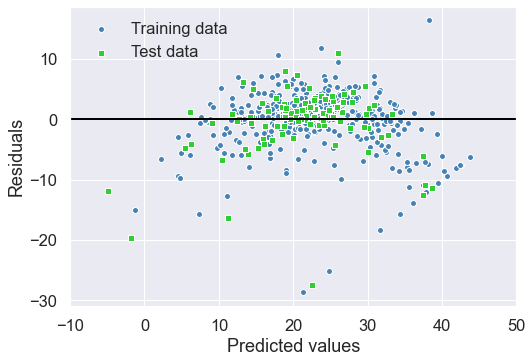

In [37]:
plt.scatter(y_train_pred3, y_train_pred3-y_train, c='steelblue', marker='o', edgecolor='white',
label='Training data') 
plt.scatter(y_test_pred3, y_test_pred3-y_test,
c='limegreen', marker='s', edgecolor='white',
label='Test data') 
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2) 
plt.xlim([-10, 50])
plt.show()

In [38]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred3),mean_squared_error(y_test, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred3), r2_score(y_test, y_test_pred3)))
print(lasso.coef_,lasso.intercept_)

MSE train: 22.239, test: 28.774
R^2 train: 0.744, test: 0.608
[ 0.56292289 -0.          0.         -0.         -0.09121884 -0.
  0.03180995 -0.         -0.         -0.1363641  -0.04606502  0.
 -0.         -0.57702188  0.         -0.          0.63214341 -1.01476427
  3.3878616  -0.         -1.59174286  0.         -0.         -1.72618034
  0.97731782 -3.54773182] 22.796534653465386


In [ ]:
print("My name is {Pengjie Ren}")
print("My NetID is: {Pengjie2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")